In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images=train_images.reshape(60000,28,28,1)
train_images=train_images.astype('float32')/255

test_images=test_images.reshape(10000,28,28,1)
test_images=test_images.astype('float32')/255
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 10s 8ms/step - loss: 0.1654 - accuracy: 0.9477
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0320 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0254 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0193 - accuracy: 0.9938


In [7]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0275 - accuracy: 0.9914


0.9914000034332275

In [8]:
import os,shutil
original_dataset_dir=r'D:\Onedrive\OneDrive - alumni.albany.edu\2021-2022年上学期\机器学习导论\archive'
base_dir=r"D:\Onedrive\OneDrive - alumni.albany.edu\2021-2022年上学期\机器学习导论\cats_and_dogs_small"
os.mkdir(base_dir)
train_dir=os.path.join(base_dir,'train')
os.makedirs(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.makedirs(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.makedirs(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')
os.makedirs(train_cats_dir)

train_dogs_dir=os.path.join(train_dir,'dogs')
os.makedirs(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir,"cats")
os.makedirs(validation_cats_dir)

validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'D:\\Onedrive\\OneDrive - alumni.albany.edu\\2021-2022年上学期\\机器学习导论\\cats_and_dogs_small'

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
import os
import random
import shutil
 
 
# source_file:源路径, target_ir:目标路径
def cover_files(source_dir, target_ir):
    for file in os.listdir(source_dir):
        source_file = os.path.join(source_dir, file)
 
        if os.path.isfile(source_file):
            shutil.copy(source_file, target_ir)
 
 
def ensure_dir_exists(dir_name):
    """Makes sure the folder exists on disk.
  Args:
    dir_name: Path string to the folder we want to create.
  """
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
 
 
def moveFile(file_dir, save_dir):
    ensure_dir_exists(save_dir)
    path_dir = os.listdir(file_dir)  
    filenumber = len(path_dir)
    rate = 0.1  # 自定义抽取图片的比例，比方说100张抽10张，那就是0.1
    picknumber = int(filenumber * rate)  # 按照rate比例从文件夹中取一定数量图片
    sample = random.sample(path_dir, picknumber)  # 随机选取picknumber数量的样本图片
    # print (sample)
    for name in sample:
        shutil.move(file_dir + name, save_dir + name)
 
#切记win10路径D:你的路径\\，最后一定要有\\才能进入目标文件  
if __name__ == '__main__':
    file_dir = 'C:\\Users\\ASUS\\Downloads\\archive\\training_set\\training_set\\dogs\\'  # 源图片文件夹路径
    save_dir = 'C:\\Users\\ASUS\\Downloads\\archive\\validation\\dogs\\'  # 移动到目标文件夹路径
    moveFile(file_dir, save_dir)


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_dir=r'C:\Users\ASUS\Downloads\archive\training_set\training_set'
validation_dir=r'C:\Users\ASUS\Downloads\archive\validation'

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 7205 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [7]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])


In [8]:
history=model.fit(train_generator,steps_per_epoch=100,epochs=10,validation_steps=50,validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 16s 123ms/step - loss: 0.6897 - acc: 0.5310 - val_loss: 0.6569 - val_acc: 0.5850
Epoch 2/10
100/100 [==============================] - 10s 100ms/step - loss: 0.6383 - acc: 0.6345
Epoch 3/10
100/100 [==============================] - 10s 100ms/step - loss: 0.5945 - acc: 0.6890
Epoch 4/10
100/100 [==============================] - 10s 101ms/step - loss: 0.5673 - acc: 0.7095
Epoch 5/10
100/100 [==============================] - 10s 100ms/step - loss: 0.5484 - acc: 0.7234
Epoch 6/10
100/100 [==============================] - 10s 101ms/step - loss: 0.5276 - acc: 0.7360
Epoch 7/10
100/100 [==============================] - 11s 112ms/step - loss: 0.5110 - acc: 0.7535
Epoch 8/10
100/100 [==============================] - 11s 110ms/step - loss: 0.5087 - acc: 0.7550
Epoch 9/10
100/100 [==============================] - 11s 109ms/step - loss: 0.4670 - acc: 0.7865
Epoch 10/10
100/100 [==============================] - 11s 105ms/step - loss: 0.4

In [9]:
import tensorflow as tf
tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [10]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
len(val_acc)

1

<Figure size 432x288 with 0 Axes>

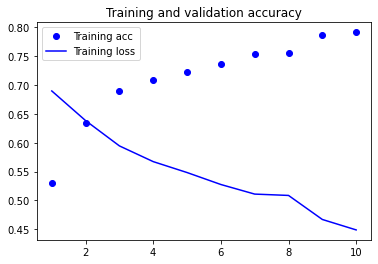

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,loss,'b',label='Training loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


In [13]:
data=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [19]:

train_datagen=ImageDataGenerator(rescale=1.0/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1.0/255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=60,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 7205 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [20]:
history=model.fit_generator(train_generator,steps_per_epoch=120,epochs=100,validation_data=validation_generator,validation_steps=20)

Epoch 1/100
120/120 [==============================] - 18s 142ms/step - loss: 0.6883 - acc: 0.5315 - val_loss: 0.7020 - val_acc: 0.5125
Epoch 2/100
120/120 [==============================] - 17s 142ms/step - loss: 0.6563 - acc: 0.5888 - val_loss: 0.7881 - val_acc: 0.5125
Epoch 3/100
120/120 [==============================] - 17s 141ms/step - loss: 0.6286 - acc: 0.6412 - val_loss: 0.6646 - val_acc: 0.6075
Epoch 4/100
120/120 [==============================] - 17s 143ms/step - loss: 0.6177 - acc: 0.6475 - val_loss: 0.5894 - val_acc: 0.6800
Epoch 5/100
120/120 [==============================] - 17s 141ms/step - loss: 0.6074 - acc: 0.6627 - val_loss: 0.5797 - val_acc: 0.6975
Epoch 6/100
120/120 [==============================] - 17s 141ms/step - loss: 0.5911 - acc: 0.6799 - val_loss: 0.6112 - val_acc: 0.6650
Epoch 7/100
120/120 [==============================] - 17s 142ms/step - loss: 0.5854 - acc: 0.6846 - val_loss: 0.6090 - val_acc: 0.6750
Epoch 8/100
120/120 [===========================

In [21]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

<Figure size 432x288 with 0 Axes>

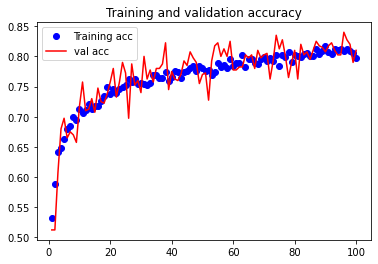

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


<Figure size 432x288 with 0 Axes>

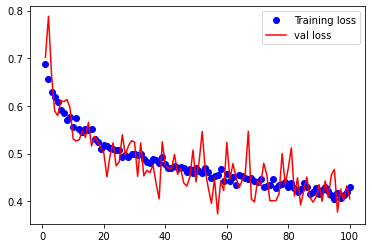

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'r',label='val loss')
plt.legend()
plt.figure()